In [1]:
# 回忆前面的例子
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed= 666
X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

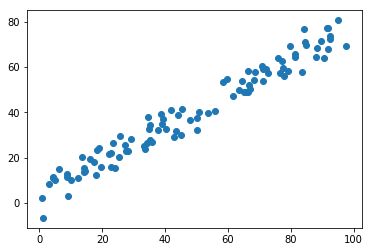

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

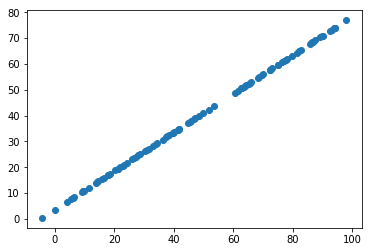

In [9]:
plt.scatter(X_restore[:, 0],X_restore[:, 1])

In [10]:
# 我们丢失了一部分信息 但是丢掉的可能就是噪音

# 手写识别的例子

In [11]:
from sklearn import datasets

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [16]:
X.shape

(1797, 64)

In [17]:
# 原来的X是一些数据的每个像素的值  

In [19]:
# 当真实值是0的前10个X样本 (有噪声)
example_digits = noisy_digits[y==0, :][:10]

for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [20]:
example_digits.shape

(100, 64)

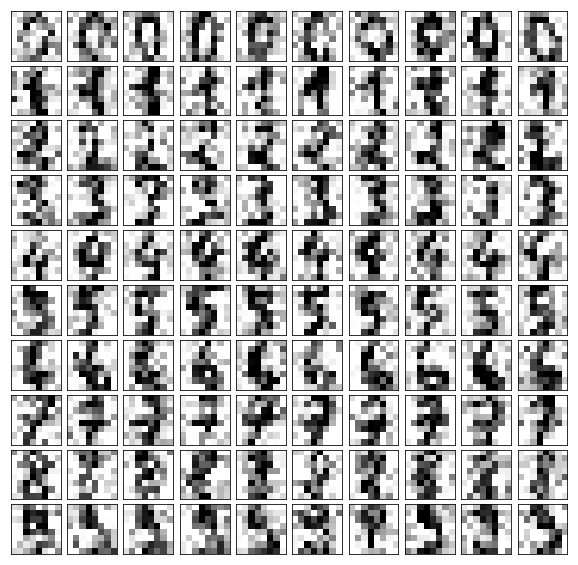

In [23]:
# 每个数字有10个样本(都有噪声)
# 绘制这些数字
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10),
                             subplot_kw={"xticks":[], "yticks":[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap="binary", 
                  interpolation="nearest",
                 clim=(0,16))
    plt.show()
plot_digits(example_digits)

In [31]:
# 可以看到这些都有噪音
# 使用PCA降噪
# 噪音比较多时, 调低这个值
pca = PCA(0.4)
pca.fit(noisy_digits)
digits_red = pca.transform(example_digits)
digits_restore = pca.inverse_transform(digits_red)

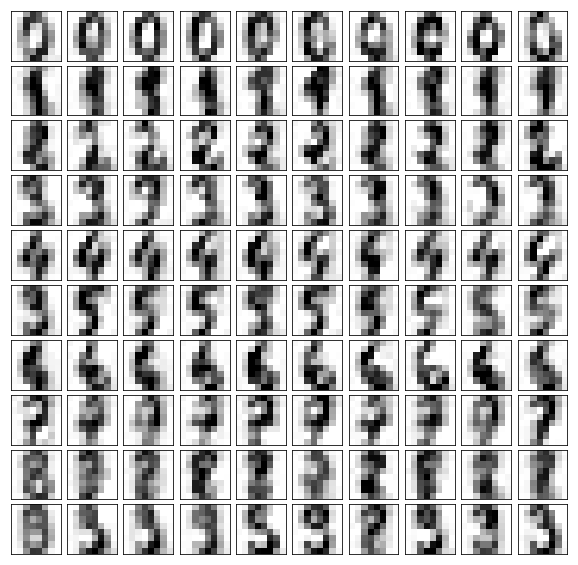

In [32]:
plot_digits(digits_restore)